In [115]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import model_from_json
from keras.utils import multi_gpu_model 
from keras.utils import to_categorical


Read the data
===========

In [132]:
x_original=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
y_original=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

# x_original=x_original[['Unnamed: 0','L103000', 'L103300', 'L103100', 'L101700', 'L100800', 'S000300', 'L100700',
#                        'L102900','AGE', 'SEX', 'L190400', 'L190300', 'L190500', 'S000501', 'L101300', 'S000502', 
#                        'L104600','FIELD_33', 'FIELD_7', 'FIELD_38', 'FIELD_6', 'FIELD_40', 'FIELD_41', 'FIELD_31', 
#                        'FIELD_27', 'FIELD_42', 'FIELD_18', 'FIELD_25']]

# y_original=y_original[['Unnamed: 0','L103000', 'L103300', 'L103100', 'L101700', 'L100800', 'S000300', 'L100700',
#                        'L102900','AGE','SEX', 'L190400', 'L190300', 'L190500', 'S000501', 'L101300', 'S000502', 
#                        'L104600','FIELD_33', 'FIELD_7', 'FIELD_38', 'FIELD_6', 'FIELD_40', 'FIELD_41', 'FIELD_31', 
#                        'FIELD_27', 'FIELD_42', 'FIELD_18', 'FIELD_25']]


# x_original=x_original[['Unnamed: 0','L104600','L100800','AGE','S000300','L103300','L103000',
# 'L102900','S000501','L101300','FIELD_38','L103100','L101700',
# 'S000502','L100700']]

# y_original=y_original[['Unnamed: 0','L103000', ]]



# x_original=x_original[['Unnamed: 0','L103000','L103300','L103100','S000300','L102900','L100800','L101700',
# 'L104600','AGE','S000501','L100700','S000502','L101300',
# 'L190300','L190400','L190500']]

x_original=x_original[['Unnamed: 0','L103000', 'L101700', 'L103100', 'L102900', 'L100800', 'S000300', 'S001200', 'S000200', 'L100700', 'L101300', 
'L190000', 'S000502', 'S000501', 'AGE', 'L100300', 'L190400', 'L100100', 'L190800', 'L101000', 'L190300', 'L101600',
'SEX',
'FIELD_33', 'FIELD_38', 'FIELD_31', 'FIELD_40', 'FIELD_41', 'FIELD_42', 'FIELD_29', 'FIELD_27', 'FIELD_28', 
'FIELD_25', 'FIELD_32', 'FIELD_4', 'FIELD_21', 'FIELD_19', 'FIELD_26', 'FIELD_18', 'FIELD_14', 'FIELD_13', 
'FIELD_20', 'FIELD_15', 'FIELD_16', 'FIELD_17', 'FIELD_22', 'FIELD_23', 'FIELD_24']]

y_original=y_original[['Unnamed: 0','L103000', ]]



print(x_original.shape)
print(y_original.shape)


(159381, 48)
(159381, 2)


Prepare the data
============

In [133]:
# df=x_original.copy()
# conditions = [
#     (df.S000501 < 120)  ,
#     (df.S000501 >= 120) & (df.S000501 < 130),
#     (df.S000501 >=130)]
# choices = [0,1,2]
# df['sbpG'] = np.select(conditions, choices, default=0)
# df.head()
# x_original=df.copy()

# conditions2 = [
#     (df.S000502 < 80)  ,
#     (df.S000502 >= 80) & (df.S000502 < 90),
#     (df.S000502 >=90)]
# choices2 = [0,1,2]
# df['dbpG'] = np.select(conditions2, choices2, default=0)
# df.head()
# x_original=df.copy()

# conditions3 = [
#     (df.AGE < 30)  ,
#     (df.AGE >= 30) & (df.AGE < 40),
#     (df.AGE >= 40) & (df.AGE < 50),
#     (df.AGE >= 50) & (df.AGE < 60),
#     (df.AGE >= 60)]
# choices3 = [0,1,2,3,4]
# df['AgeG'] = np.select(conditions3, choices3, default=0)
# df.head()
# x_original=df.copy()


# conditions4 = [
#     (df.L100800 < 100)  ,
#     (df.L100800 >= 100) & (df.L100800 < 126), 
#     (df.L100800 >= 126)]
# choices4 = [0,1,2]
# df['CLASS'] = np.select(conditions4, choices4, default=0)
# df.head()
# x_original=df.copy()

In [134]:
data= pd.merge(x_original,y_original, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data=data.dropna(). reset_index()

# data=data[data.AGE_x >= 40]
# data=data[data.AGE_x < 50]

# data=data[data.CLASS_x==0]
# data=data[data.sbpG==0]
# data=data[data.dbpG==0]

# data=data[data.L100800_y <200]

data=data[data.SEX==0]
data=data[data.FIELD_15!=1]
data=data[data.FIELD_17!=1]
data=data[data.FIELD_22!=1]
data=data[data.FIELD_24!=1]

data=data[data.AGE >= 40]
data=data[data.AGE < 50]

print(data.shape)

(34203, 50)


In [135]:
print(data.shape)
print(data.columns)
data.head()

(34203, 50)
Index(['index', 'Unnamed: 0', 'L103000_x', 'L101700', 'L103100', 'L102900',
       'L100800', 'S000300', 'S001200', 'S000200', 'L100700', 'L101300',
       'L190000', 'S000502', 'S000501', 'AGE', 'L100300', 'L190400', 'L100100',
       'L190800', 'L101000', 'L190300', 'L101600', 'SEX', 'FIELD_33',
       'FIELD_38', 'FIELD_31', 'FIELD_40', 'FIELD_41', 'FIELD_42', 'FIELD_29',
       'FIELD_27', 'FIELD_28', 'FIELD_25', 'FIELD_32', 'FIELD_4', 'FIELD_21',
       'FIELD_19', 'FIELD_26', 'FIELD_18', 'FIELD_14', 'FIELD_13', 'FIELD_20',
       'FIELD_15', 'FIELD_16', 'FIELD_17', 'FIELD_22', 'FIELD_23', 'FIELD_24',
       'L103000_y'],
      dtype='object')


,index,Unnamed: 0,L103000_x,L101700,L103100,L102900,L100800,S000300,S001200,S000200,...,FIELD_14,FIELD_13,FIELD_20,FIELD_15,FIELD_16,FIELD_17,FIELD_22,FIELD_23,FIELD_24,L103000_y
24185,28053,28053,73.0,15.0,50.0,186.0,88.0,23.6,81.0,73.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
24192,28062,28062,223.0,56.0,46.0,178.0,111.0,28.8,98.0,88.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.0
24213,28083,28083,208.0,32.0,31.0,204.0,96.0,30.2,99.0,94.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278.0
24341,28224,28224,328.0,79.0,54.0,236.0,97.0,24.4,83.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0
24345,28229,28229,49.0,26.0,50.0,235.0,99.0,27.3,92.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0


In [136]:
# x=data[['L103000_x', 'L103300_x', 'L103100_x', 'L101700_x', 'L100800_x', 'S000300_x', 'L100700_x',
#         'L102900_x', 'AGE_x','SEX_x', 'L190400_x', 'L190300_x', 'L190500_x', 'S000501_x', 'L101300_x', 'S000502_x', 
#         'L104600_x','FIELD_33_x', 'FIELD_7_x', 'FIELD_38_x',  'FIELD_40_x', 'FIELD_41_x', 'FIELD_31_x', 
#         'FIELD_27_x', 'FIELD_42_x', 'FIELD_18_x', 'FIELD_25_x','FIELD_6_x',
#         'CLASS','sbpG','dbpG','AgeG']]

# y=data[['L103000_y', 'L103300_y', 'L103100_y', 'L101700_y', 'L100800_y', 'S000300_y', 'L100700_y',
#         'L102900_y','AGE_y', 'SEX_y', 'L190400_y', 'L190300_y', 'L190500_y', 'S000501_y', 'L101300_y', 'S000502_y', 
#         'L104600_y','FIELD_33_y', 'FIELD_7_y', 'FIELD_38_y',  'FIELD_40_y', 'FIELD_41_y', 'FIELD_31_y', 
#         'FIELD_27_y', 'FIELD_42_y', 'FIELD_18_y', 'FIELD_25_y','FIELD_6_y',
#        ]]

# x=data[['L103000_x', 'L104600','L100800','AGE','S000300','L103300',
# 'L102900','S000501','L101300','FIELD_38','L103100','L101700',
# 'S000502','L100700',
#         'CLASS','sbpG','dbpG','AgeG']]

# x=data[['L103000_x', 'L103300','L103100','S000300','L102900','L100800','L101700',
# 'L104600','AGE','S000501','L100700','S000502','L101300',
# 'L190300','L190400','L190500',
#         'CLASS','sbpG','dbpG','AgeG']]

y=data[['L103000_y']]

Check the correlation of the selected feature with the independent variables
=====

In [137]:
temppd=pd.DataFrame(data.copy())
temppd['y']=y.L103000_y
temppd.head()
corval=abs(temppd.corr()).sort_values(by='y', ascending=False)

In [138]:
corval.y[:25].index

Index(['y', 'L103000_y', 'L103000_x', 'L103100', 'L101700', 'S001200',
       'L102900', 'S000300', 'L100700', 'L100800', 'S000200', 'L101300',
       'L190000', 'FIELD_33', 'S000501', 'S000502', 'L190400', 'L190800',
       'L190300', 'L100100', 'FIELD_38', 'L101000', 'L101600', 'FIELD_40',
       'L100300'],
      dtype='object')

In [139]:
#histogram plot of the features
# import matplotlib.pyplot as plt
# x[x.dtypes[(x.dtypes=="float64")|(x.dtypes=="int64")]
#                         .index.values].hist(figsize=[11,11])

In [140]:
x=data[['L103000_x', 'L103100', 'L101700', 'S001200',
       'L102900', 'S000300', 'L100700', 'L100800', 'S000200', 'L101300',
       'L190000', 'FIELD_33', 'S000501', 'S000502', 'L190400', 'L190800',
       'L190300', 'L100100', 'FIELD_38', 'L101000', 'L101600', 'FIELD_40',
       'L100300']]

y=data[['L103000_y']]

In [141]:
# plt.hist(math.pow(x.L103000_x,0.05),bins=50)
# plt.show()
# math.pow(x.L103000_x,0.05)

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

x=x[x.columns[:15]]

In [142]:
# x=x[['L103000_x' , 'L103100' , 'L101700' , 'S001200' , 'L102900' , 'S000300' , 'L100700']]

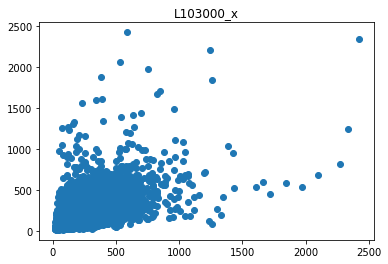

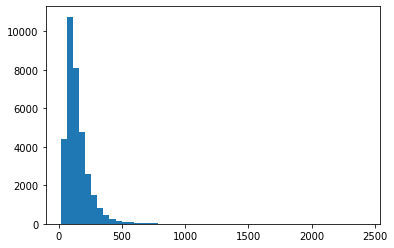

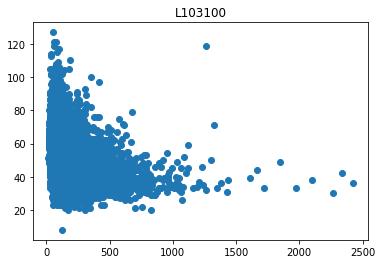

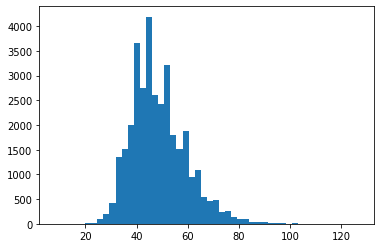

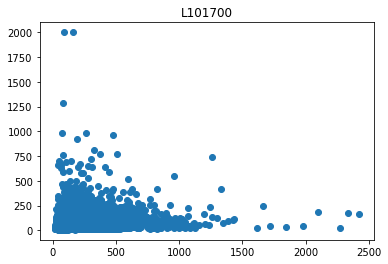

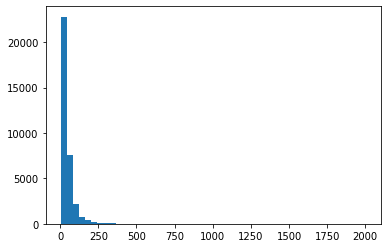

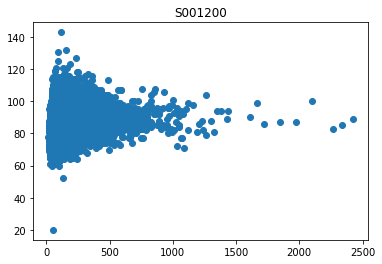

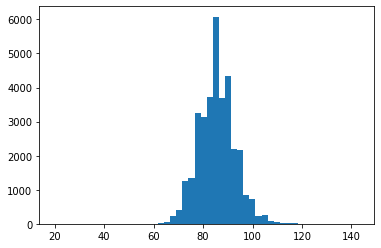

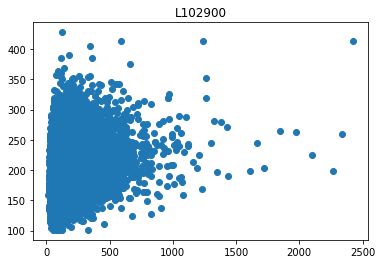

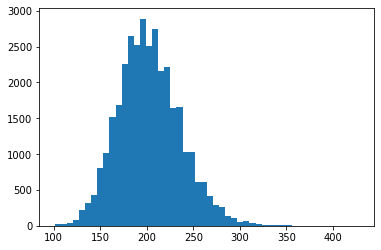

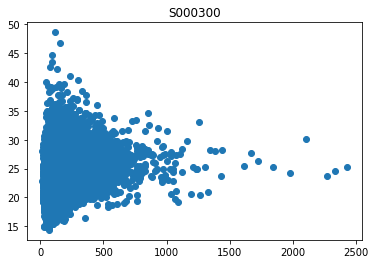

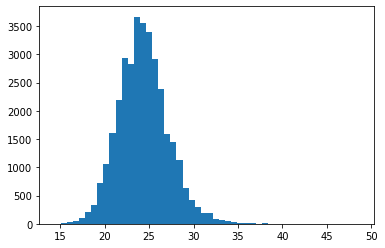

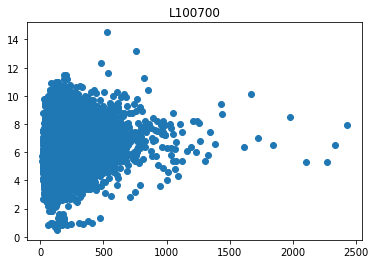

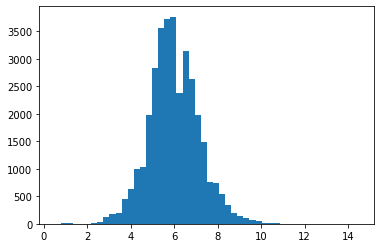

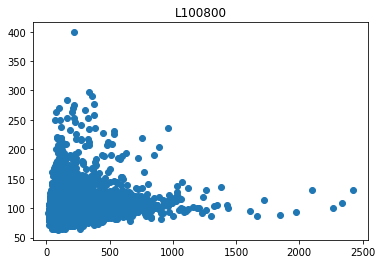

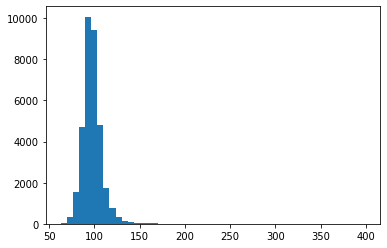

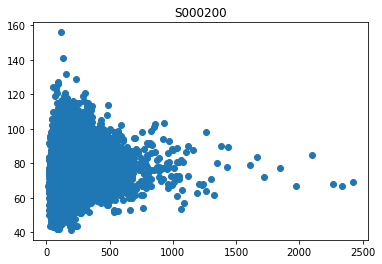

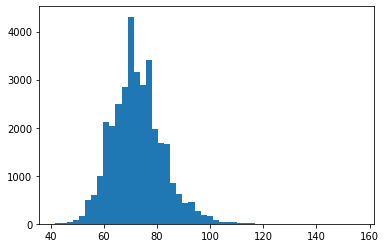

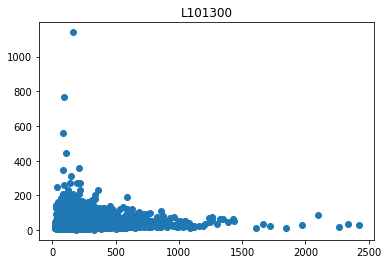

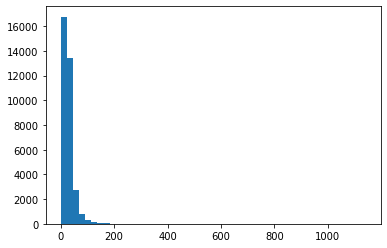

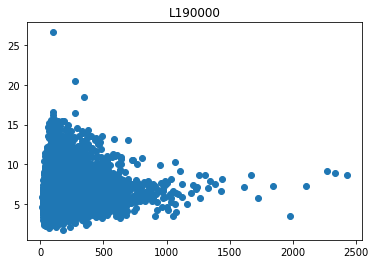

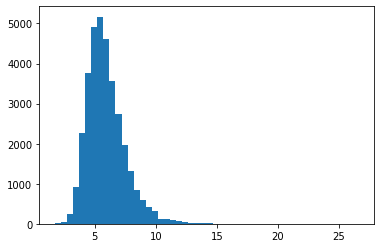

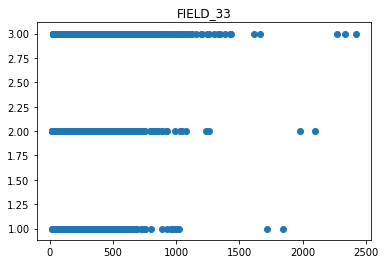

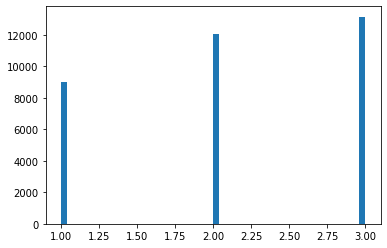

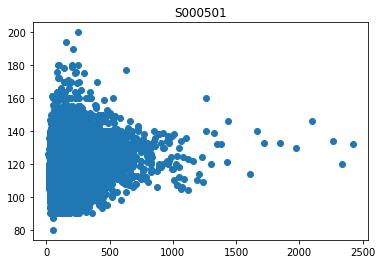

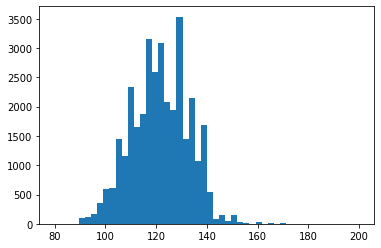

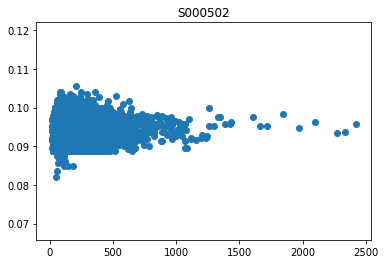

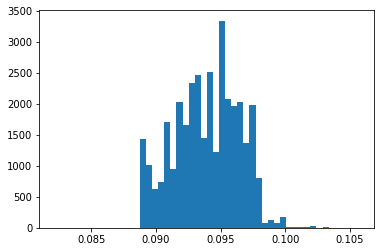

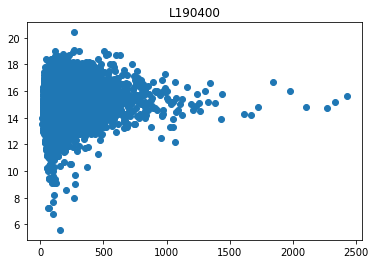

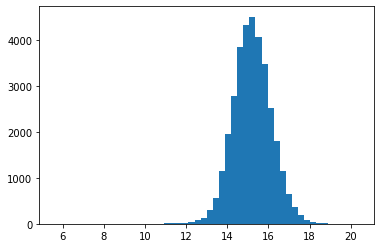

In [159]:
for i in x.columns:
    plt.title(i)
    plt.scatter(y,x[i])
    plt.show()
    plt.hist(x[i],bins=50)
    plt.show()

In [153]:
x.columns

Index(['L103000_x', 'L103100', 'L101700', 'S001200', 'L102900', 'S000300',
       'L100700', 'L100800', 'S000200', 'L101300', 'L190000', 'FIELD_33',
       'S000501', 'S000502', 'L190400'],
      dtype='object')

In [158]:
x.S000502=np.log10(x.S000502)

Apply PCA
===========

In [144]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=8)
# pca.fit(x)

# print(pca.explained_variance_ratio_)   
# print(np.sum(pca.explained_variance_ratio_))

# x=pca.fit_transform(x) 
# print(x.shape)


feature scaling
=======

In [145]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()  #StandardScaler()
# x = min_max_scaler.fit_transform(x)

clustring test
==========

In [146]:
# from sklearn.cluster import KMeans
# from scipy.spatial.distance import cdist

# K = range(1,10)
# distortions = []

# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(x)
#     kmeanModel.fit(x)
#     distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# # Plot the elbow
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()


In [147]:
# kmeanModel = KMeans(n_clusters=k).fit(x)
# x['lbl']=kmeanModel.labels_ 

In [148]:
# x.columns

Random Forest Regressor
=============

In [149]:
ylable=y[['L103000_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [150]:
regr = RandomForestRegressor(max_depth=7, random_state=0,verbose =0,n_estimators=500)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)


[0.8110392  0.01274149 0.02210797 0.00707171 0.01577679 0.00861752
 0.01788208 0.01106341 0.01029134 0.01698238 0.03326462 0.00501661
 0.0073992  0.00740408 0.01334159]


mean_squared_error 6338.997036319476
root mean_squared_error 79.61781858553697
mean_absolute_error 47.71757563198881
r2_score 0.4391664518058297


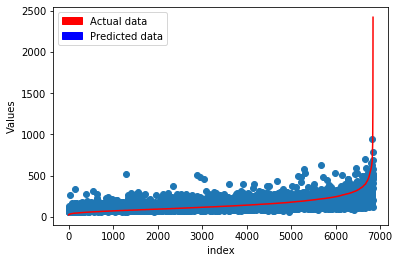

,t + 1,pred (t +1)
6611,878.0,580.143738
460,890.0,461.719149
6002,1119.0,407.952430
5571,1206.0,491.730364
6322,1260.0,783.884993
34,1263.0,119.095660
4963,1328.0,208.866479
1920,1720.0,343.461114
6228,2099.0,477.574593
2788,2423.0,686.104613


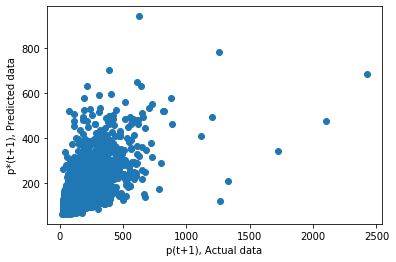

In [151]:

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.tail(10)

In [152]:
# tempdata=pd.DataFrame(xtest.copy())
# tempdata['ytest']=ytest
# # temp=temp.dropna()
# # tempdata.head()
# # tempdata[tempdata.ytest.isna()].index

# tempdata=tempdata.drop(tempdata[tempdata.ytest.isna()].index)


xg boost
==========

In [20]:
import xgboost as xgb
# from sklearn.metrics import mean_squared_error
# import pandas as pd
# import numpy as np

In [21]:
xg_reg = xgb.XGBRegressor()
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
#                           learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(xtrain, ytrain) 

[02:23:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [22]:

ypred = xg_reg.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

# ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
# ypredPD['t + 1']=ytest.values
# ypredPD['pred (t +1)']=ypred
# ypredPD.head(10)

mean_squared_error 3953.1886779960605
root mean_squared_error 62.87438809241853
mean_absolute_error 37.5492489490291
r2_score 0.505763468379308


In [23]:
# ytest[ytest.isna()].shape
# tempdata.iloc[:,-1]

ANN
==========

In [ ]:
model= Sequential()
model.add(Dense(input_dim=32,units=128,activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=128, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=1, kernel_initializer='uniform'))
model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mean_squared_error' ])

In [ ]:
h=model.fit(xtrain, ytrain, validation_split=.2,epochs=100, batch_size=50)

In [ ]:
ypred=model.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

In [ ]:
history=h
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
ypredPD['diff']=abs(ypredPD['t + 1']- ypredPD['pred (t +1)'])
print(np.mean(ypredPD['diff']))
print(np.std(ypredPD['diff']))
print(100*ypredPD[ypredPD['diff']<=5].shape[0]/ypredPD.shape[0])

In [ ]:

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.head(10)

SVR
======

In [ ]:
from sklearn.svm import SVR
# svr_rbf = SVR(kernel='rbf', C=10, gamma=0.02, epsilon=.001)
svr_rbf = SVR(kernel='rbf')

In [ ]:
svr_rbf.fit(xtrain, ytrain) 

In [ ]:
ypred=svr_rbf.predict(xtest)

In [ ]:
import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)